Using TensorFlow backend.
C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\acer\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Instructions for updating:
Use tf.cast instead.
Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 527us/step - loss: 0.6071 - accuracy: 0.7005 - val_loss: 0.5073 - val_accuracy: 0.7891
Epoch 2/100
5359/5359 [==============================] - 2s 328us/step - loss: 0.4854 - accuracy: 0.7964 - val_loss: 0.4757 - val_accuracy: 0.7906
Epoch 3/100
5359/5359 [==============================] - 2s 324us/step - loss: 0.4588 - accuracy: 0.8013 - val_loss: 0.4555 - val_accuracy: 0.8039
Epoch 4/100
5359/5359 [==============================] - 2s 321us/step - loss: 0.4396 - accuracy: 0.8123 - val_loss: 0.4398 - val_accuracy: 0.8099
Epoch 5/100
5359/5359 [==============================] - 2s 322us/step - loss: 0.4249 - accuracy: 0.8224 - val_loss: 0.4286 - val_accuracy: 0.8167
Epoch 6/100
5359/5359 [==============================] - 2s 367us/step - loss: 0.4127 - accuracy: 0.8276 - val_loss: 0.4174 - val_accuracy: 0.8167
Epoch 7/100
5359/5359 

5359/5359 [==============================] - 1s 255us/step - loss: 0.3295 - accuracy: 0.8664 - val_loss: 0.3526 - val_accuracy: 0.8550
Epoch 55/100
5359/5359 [==============================] - 1s 253us/step - loss: 0.3293 - accuracy: 0.8675 - val_loss: 0.3529 - val_accuracy: 0.8550
Epoch 56/100
5359/5359 [==============================] - 1s 265us/step - loss: 0.3291 - accuracy: 0.8681 - val_loss: 0.3527 - val_accuracy: 0.8550
Epoch 57/100
5359/5359 [==============================] - 2s 288us/step - loss: 0.3289 - accuracy: 0.8681 - val_loss: 0.3529 - val_accuracy: 0.8542
Epoch 58/100
5359/5359 [==============================] - 1s 262us/step - loss: 0.3288 - accuracy: 0.8662 - val_loss: 0.3530 - val_accuracy: 0.8557
Epoch 59/100
5359/5359 [==============================] - 1s 255us/step - loss: 0.3286 - accuracy: 0.8675 - val_loss: 0.3528 - val_accuracy: 0.8546
Epoch 60/100
5359/5359 [==============================] - 1s 256us/step - loss: 0.3287 - accuracy: 0.8656 - val_loss: 0.3527 

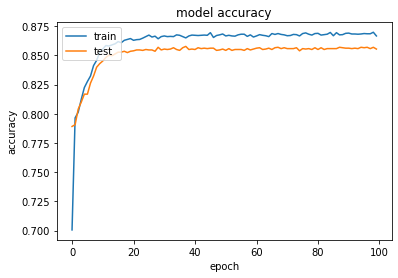

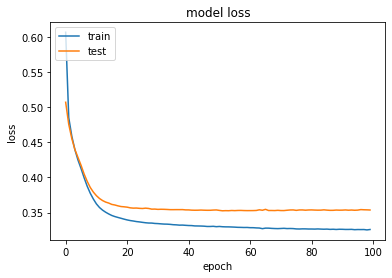

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
data = pd.read_csv('dataset.csv')
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns as we have created dummy variables for them
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))
#input dimensions must be same as number of features
#output_dim also replaced by units and init as kernel_initializer

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
